<a href="https://colab.research.google.com/github/Sakhile-Ngcobo/Predicting-Customer-Churn/blob/main/Predicting_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
!git clone https://github.com/Lungisanikhan/Telco-Customer-Churn.git

fatal: destination path 'Telco-Customer-Churn' already exists and is not an empty directory.


In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
data = pd.read_csv('/content/Telco-Customer-Churn/Telco-Customer-Churn - Cleaned.csv')

In [103]:
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

In [104]:
#determining the size of the feaure space
print('This dataset consists of {} features.'.format(len(data.columns)))

This dataset consists of 21 features.


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [106]:
data.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2279.798992
std         0.368612    24.559481       30.090047   2266.730170
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    398.550000
50%         0.000000    29.000000       70.350000   1394.550000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000

In [107]:
#checking for missing values
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [108]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
y= data['Churn']
X = data.drop(['Churn', 'customerID'], axis=1)

In [111]:
pre_X_train, pre_X_test, pre_y_train, pre_y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Building a preprocessing pipeline


In [112]:
categorical_feat = data.drop(['customerID','Churn'], axis=1).select_dtypes(include='object').columns.tolist()
numeric_feat = data.select_dtypes(include='number').columns.tolist()

In [113]:
categorical_feat

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [114]:
data[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']].head()

SeniorCitizen  tenure  MonthlyCharges  TotalCharges
0              0       1           29.85         29.85
1              0      34           56.95       1889.50
2              0       2           53.85        108.15
3              0      45           42.30       1840.75
4              0       2           70.70        151.65

In [115]:
data.head(1)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   

      PaymentMethod MonthlyCharges  TotalCharges  Churn  
0  Electronic check          29.85         29.85     No  

[1 rows x 21 columns]

In [116]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [117]:
cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('num', num_transformer, numeric_feat),
    ('cat', cat_transformer, categorical_feat)

])

In [118]:
pre_pipe = Pipeline([
    ('preprocessor', preprocessor)
])

In [119]:
pre_X_train.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
1695    Male              0     Yes        Yes      54          Yes   
1095    Male              0      No         No       1          Yes   
3889    Male              0      No         No      13          Yes   
3667  Female              1     Yes        Yes      24          Yes   
2902  Female              1      No         No       6          Yes   

     MultipleLines InternetService       OnlineSecurity         OnlineBackup  \
1695           Yes             DSL                   No                  Yes   
1095            No     Fiber optic                   No                   No   
3889            No              No  No internet service  No internet service   
3667            No     Fiber optic                   No                   No   
2902            No     Fiber optic                  Yes                   No   

         DeviceProtection          TechSupport          StreamingTV  \
1695                   No                  Yes                  Yes   
1095                   No                   No                  Yes   
3889  No internet service  No internet service  No internet service   
3667                  Yes                   No                  Yes   
2902                   No                   No                   No   

          StreamingMovies        Contract PaperlessBilling  \
1695                   No        One year              Yes   
1095                   No  Month-to-month              Yes   
3889  No internet service        One year               No   
3667                  Yes        Two year              Yes   
2902                   No  Month-to-month              Yes   

                PaymentMethod  MonthlyCharges  TotalCharges  
1695         Electronic check           70.70       3770.00  
1095         Electronic check           80.55         80.55  
3889  Credit card (automatic)           19.30        259.65  
3667         Electronic check           96.55       2263.45  
2902         Electronic check           74.10        450.90

In [120]:
pre_pipe.fit(pre_X_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])]))])

In [121]:
pre_X_train = pre_pipe.transform(pre_X_train)
pre_X_test = pre_pipe.transform(pre_X_test)

In [122]:
pre_X_train = pd.DataFrame(pre_X_train,columns= pre_pipe.named_steps['preprocessor'].get_feature_names_out())
pre_X_test = pd.DataFrame(pre_X_test,columns= pre_pipe.named_steps['preprocessor'].get_feature_names_out())

In [123]:
pre_X_train.head(1)

num__SeniorCitizen  num__tenure  num__MonthlyCharges  num__TotalCharges  \
0           -0.436831     0.881078             0.195927           0.654495   

   cat__gender_Female  cat__gender_Male  cat__Partner_No  cat__Partner_Yes  \
0                 0.0               1.0              0.0               1.0   

   cat__Dependents_No  cat__Dependents_Yes  ...  cat__StreamingMovies_Yes  \
0                 0.0                  1.0  ...                       0.0   

   cat__Contract_Month-to-month  cat__Contract_One year  \
0                           0.0                     1.0   

   cat__Contract_Two year  cat__PaperlessBilling_No  \
0                     0.0                       0.0   

   cat__PaperlessBilling_Yes  cat__PaymentMethod_Bank transfer (automatic)  \
0                        1.0                                           0.0   

   cat__PaymentMethod_Credit card (automatic)  \
0                                         0.0   

   cat__PaymentMethod_Electronic check  cat__PaymentMethod_Mailed check  
0                                  1.0                              0.0  

[1 rows x 45 columns]

In [124]:
#sns.pairplot(pre_X_train)

<Axes: >

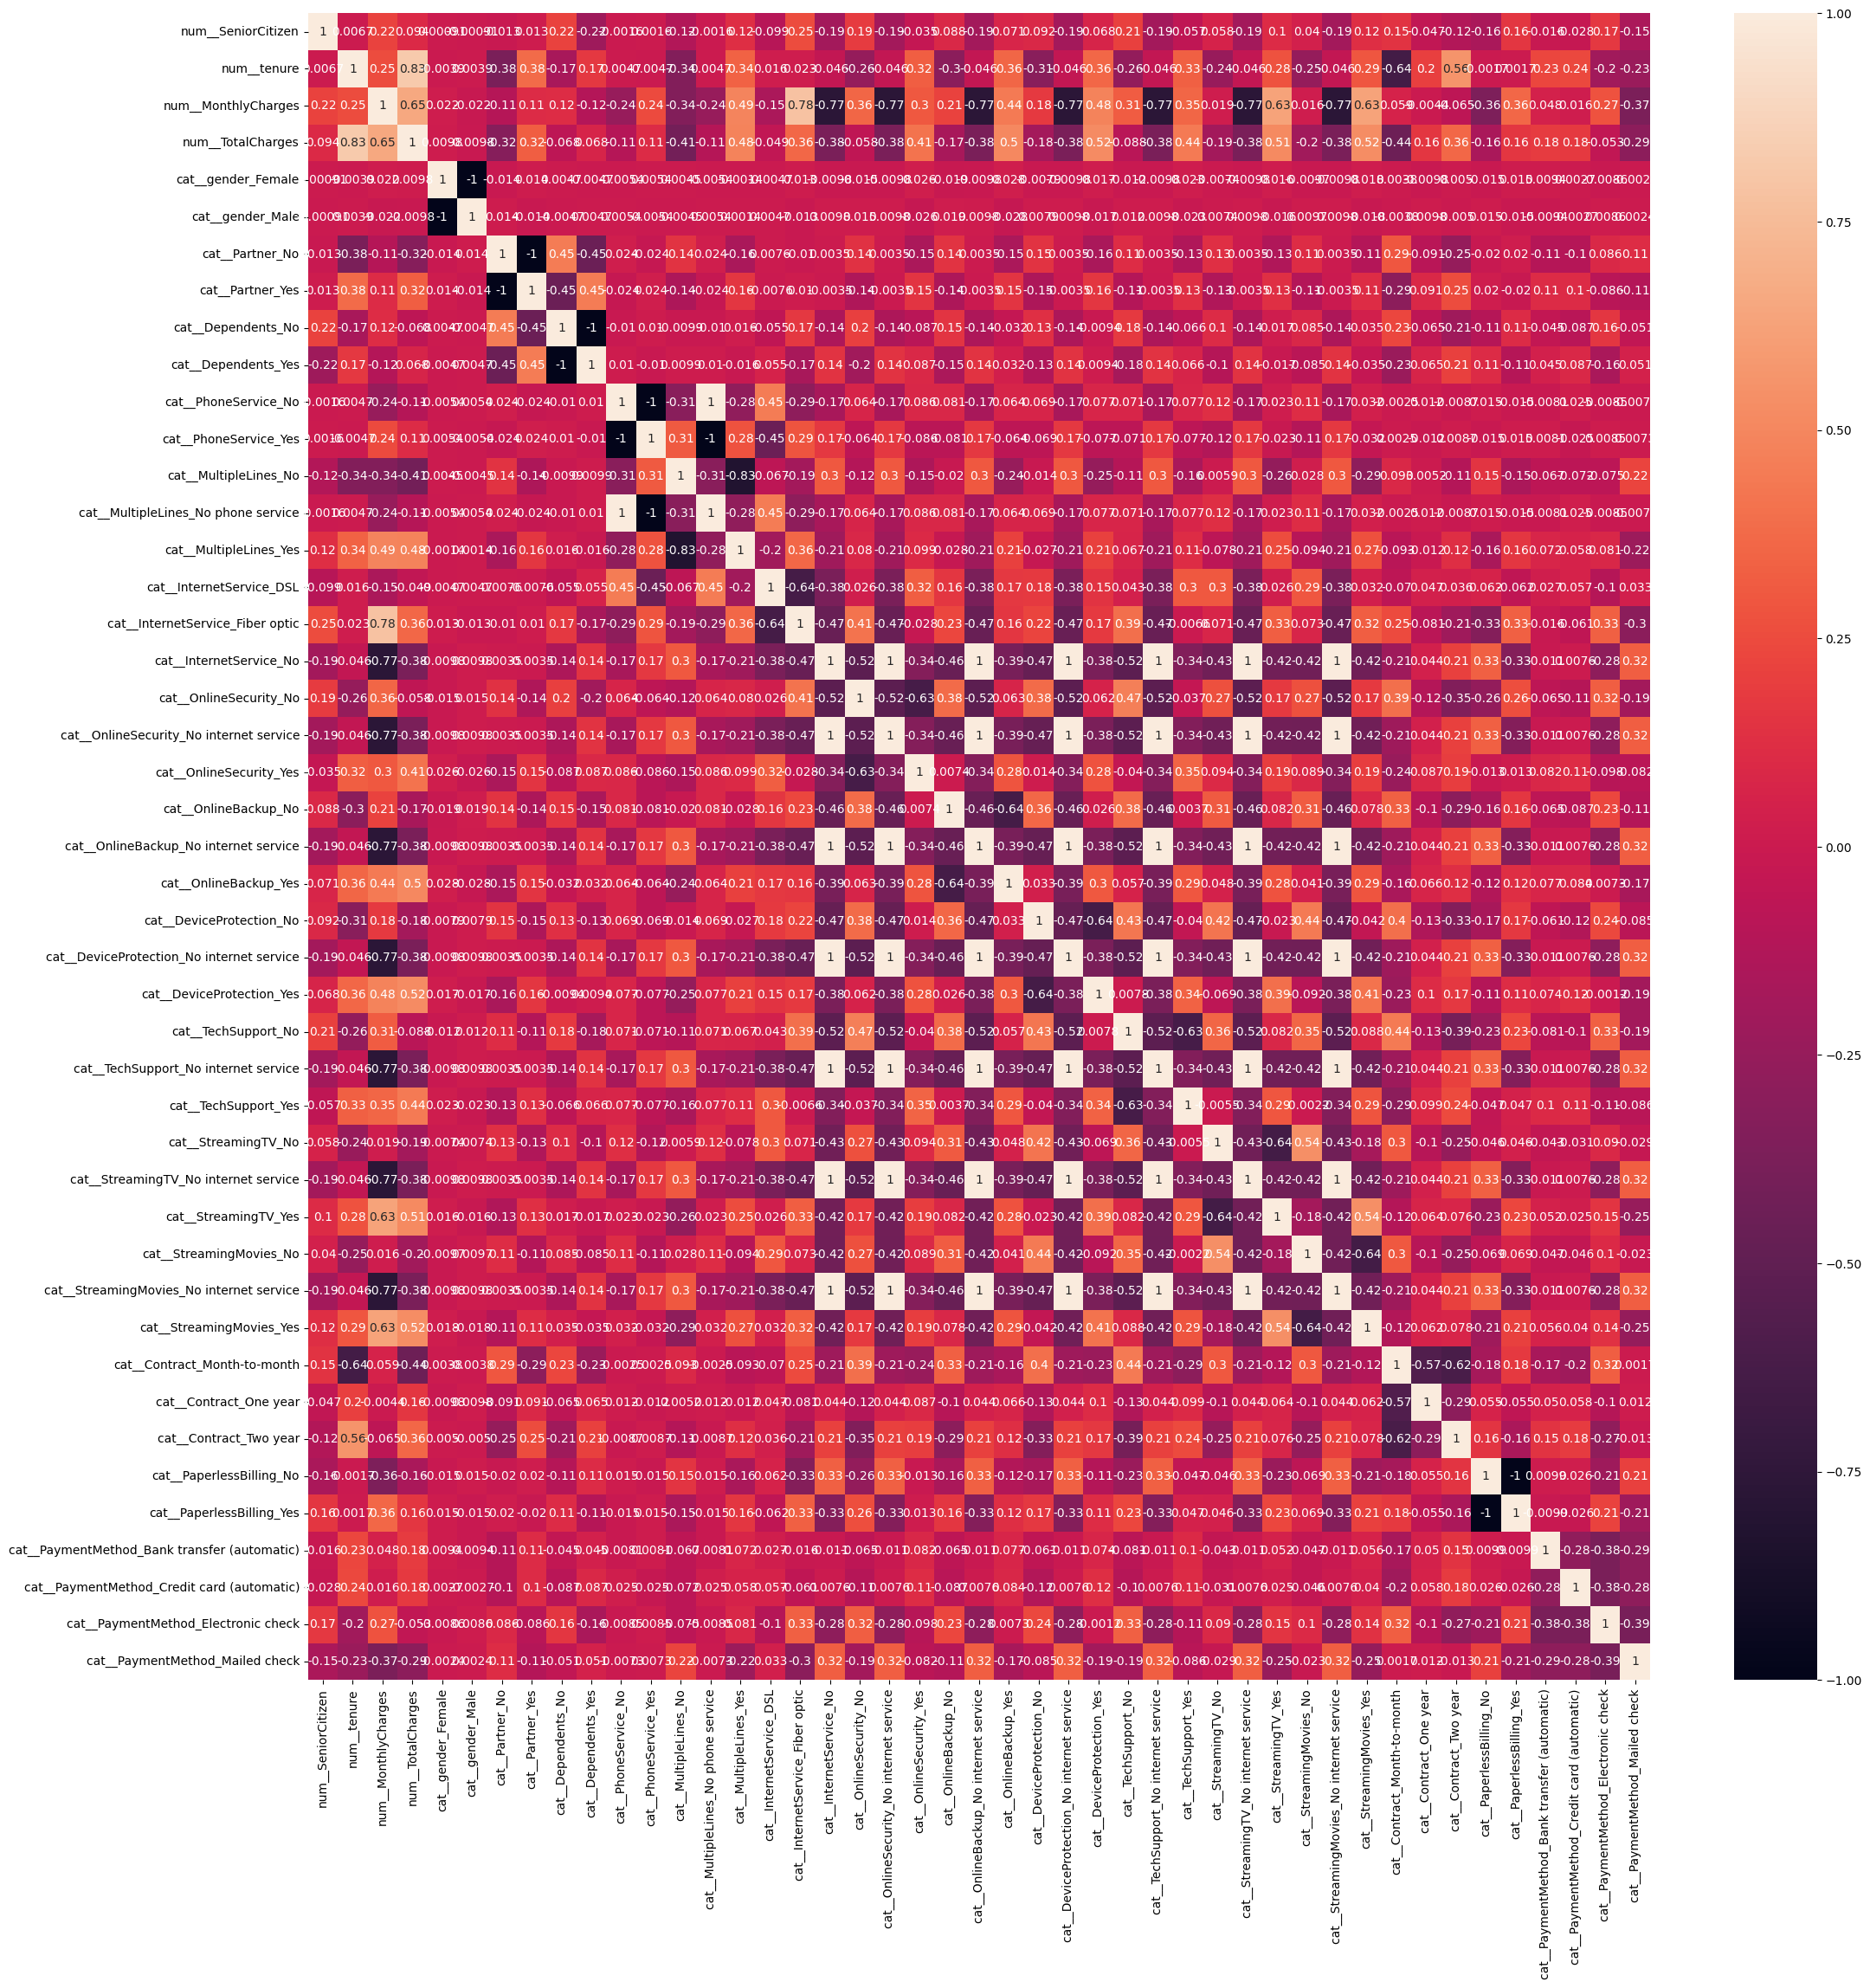

In [125]:
plt.figure(figsize=(25,25))
corrmat = pre_X_train.corr()
sns.heatmap(corrmat, annot=True)

Ideallly the correlation heatmap should show a strong correlation with the target feature and the feature with itself(Among the diagonal). In the above there is strong correlation amongst features breaking the previously mentioned criterion

In [126]:
%pip install feature-engine

In [127]:
from feature_engine.selection import SmartCorrelatedSelection, DropConstantFeatures, DropDuplicateFeatures

In [128]:
feat_pipe = Pipeline([
    ('constant', DropConstantFeatures(tol=0.998)),
    ('duplicate', DropDuplicateFeatures()),
    ('correlated', SmartCorrelatedSelection(threshold=0.8,selection_method='variance', ))
])

In [129]:
feat_pipe.fit(pre_X_train)

Pipeline(steps=[('constant', DropConstantFeatures(tol=0.998)),
                ('duplicate', DropDuplicateFeatures()),
                ('correlated',
                 SmartCorrelatedSelection(selection_method='variance'))])

In [130]:
pre_X_train = feat_pipe.transform(pre_X_train)
pre_X_test = feat_pipe.transform(pre_X_test)

In [131]:
pre_X_train

num__SeniorCitizen  num__MonthlyCharges  num__TotalCharges  \
0              -0.436831             0.195927           0.654495   
1              -0.436831             0.522755          -0.974089   
2              -0.436831            -1.509551          -0.895031   
3               2.289215             1.053643          -0.010521   
4               2.289215             0.308740          -0.810610   
...                  ...                  ...                ...   
4925           -0.436831             1.002213          -0.967710   
4926           -0.436831             0.872809          -0.039279   
4927           -0.436831            -1.448167          -0.874549   
4928            2.289215             1.149866          -0.479879   
4929           -0.436831            -1.492960          -0.807785   

      cat__gender_Female  cat__Partner_No  cat__Dependents_Yes  \
0                    0.0              0.0                  1.0   
1                    0.0              1.0                  0.0   
2                    0.0              1.0                  0.0   
3                    1.0              0.0                  1.0   
4                    1.0              1.0                  0.0   
...                  ...              ...                  ...   
4925                 0.0              0.0                  0.0   
4926                 1.0              0.0                  1.0   
4927                 0.0              0.0                  1.0   
4928                 0.0              1.0                  0.0   
4929                 0.0              1.0                  0.0   

      cat__PhoneService_No  cat__MultipleLines_No  cat__InternetService_DSL  \
0                      0.0                    0.0                       1.0   
1                      0.0                    1.0                       0.0   
2                      0.0                    1.0                       0.0   
3                      0.0                    1.0                       0.0   
4                      0.0                    1.0                       0.0   
...                    ...                    ...                       ...   
4925                   0.0                    1.0                       0.0   
4926                   0.0                    0.0                       1.0   
4927                   0.0                    1.0                       0.0   
4928                   0.0                    0.0                       0.0   
4929                   0.0                    1.0                       0.0   

      cat__InternetService_Fiber optic  ...  cat__StreamingMovies_No  \
0                                  0.0  ...                      1.0   
1                                  1.0  ...                      1.0   
2                                  0.0  ...                      0.0   
3                                  1.0  ...                      0.0   
4                                  1.0  ...                      1.0   
...                                ...  ...                      ...   
4925                               1.0  ...                      0.0   
4926                               0.0  ...                      0.0   
4927                               0.0  ...                      0.0   
4928                               1.0  ...                      0.0   
4929                               0.0  ...                      0.0   

      cat__StreamingMovies_Yes  cat__Contract_Month-to-month  \
0                          0.0                           0.0   
1                          0.0                           1.0   
2                          0.0                           0.0   
3                          1.0                           0.0   
4                          0.0                           1.0   
...                        ...                           ...   
4925                       1.0                           1.0   
4926                       1.0                           0.0   
4927  

<Axes: >

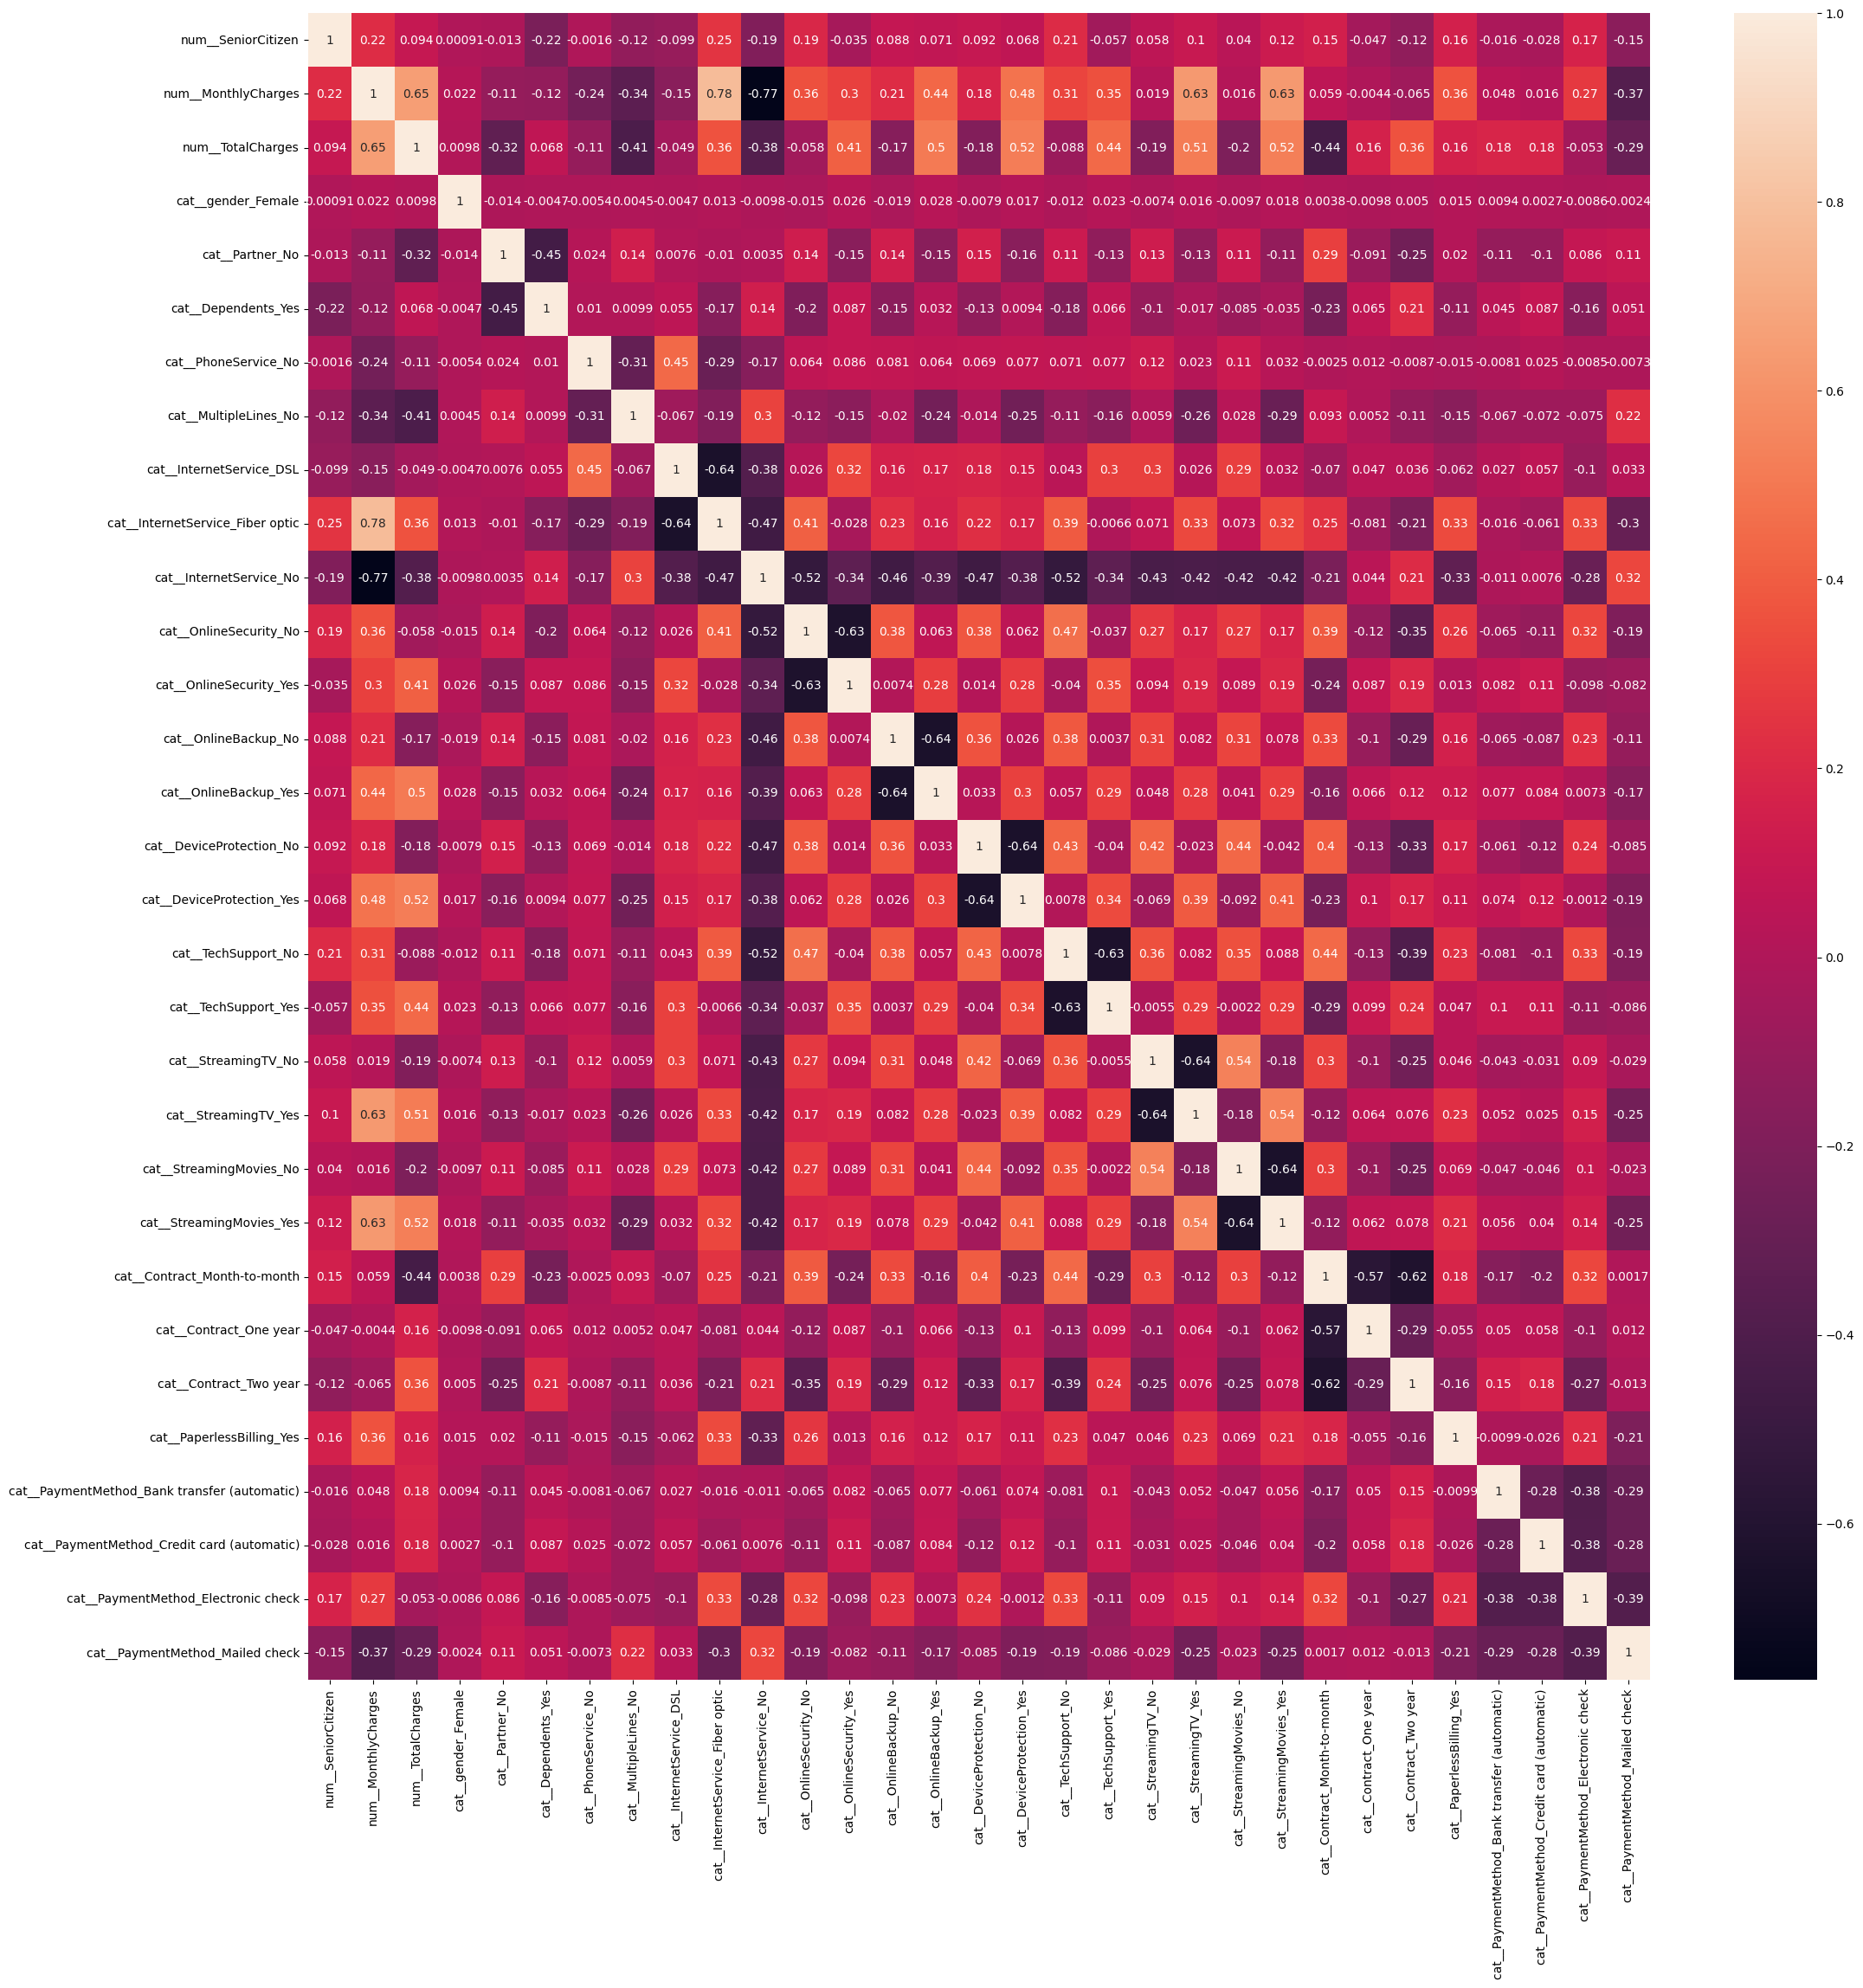

In [135]:
plt.figure(figsize=(25,25))
sns.heatmap(pre_X_train.corr(), annot=True)

In [138]:
sns.pairplot(pre_X_train)